# Codigo

## Algoritmo Dado

In [3]:
from itertools import permutations, combinations
import itertools
from networkx import Graph


def admits_solution_with_two_colors(graph: Graph) -> bool:
    for ordering in permutations(graph.nodes):
        for coloring in colorings(graph.nodes, 2):
            if is_solution(graph, ordering, coloring):
                return True
    return False


def colorings(iterable, colors: int):
    if len(iterable) == 0:
        yield {}
    else:
        first, *rest = iterable
        for smaller in colorings(rest, colors):
            for color in range(1, colors + 1):
                yield {**{first: color}, **smaller}




def is_solution(graph: Graph, ordering, coloring) -> bool:
    return all(not is_forbidden_pattern(graph, coloring, u, v, w) for u, v, w in combinations(ordering, 3))


def is_forbidden_pattern(graph: Graph, coloring, u, v, w) -> bool:
    return graph.has_edge(u, w) and (coloring[u] == coloring[v] or coloring[v] == coloring[w])

## Algoritmo Propuesto

Algoritmo para decidir si un grafo dado tiene o no $Caminitud \le 2$

In [ ]:
# REVISAR

def tiene_caminitud_menor_o_igual_a_dos(G):

    componentes = list(nx.connected_components(G))
    # Si hay mas de una isla, testear cada isla por separado
    if len(componentes) > 1:
        print(componentes)
        for comp in componentes:
            H = G.subgraph(comp).copy()
            if not tiene_caminitud_menor_o_igual_a_dos(H):
                return False
        return True

    # Ver el maximo grado (Δ) del grafo
    Delta = max(dict(G.degree()).values())

    if Delta <= 2:
        return True

    if Delta > 4:
        return False

    if tiene_K4(G) or tiene_K3n2(G):
        return False

    return admits_solution_with_two_colors(G)



In [ ]:
tiene_caminitud_menor_o_igual_a_dos

False

# Pruebas

### Pruebas Dadas

In [ ]:
import unittest
from networkx import Graph


class TestRecognition(unittest.TestCase):
    def test_graph_with_less_than_three_vertices_admits_solution(self):
        for vertices in range(3):
            with self.subTest(vertices=vertices):
                g = Graph()
                g.add_nodes_from(range(vertices))
                self.assertTrue(admits_solution_with_two_colors(g))

    def test_path_graph_admits_solution(self):
        g = Graph()
        g.add_edges_from([(0, 1), (1, 2), (2, 3)])
        self.assertTrue(admits_solution_with_two_colors(g))

    def test_triangle_graph_admits_solution(self):
        g = Graph()
        g.add_edges_from([(0, 1), (1, 2), (2, 0)])
        self.assertTrue(admits_solution_with_two_colors(g))

    def test_C4_admits_solution(self):
        g = Graph()
        g.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
        self.assertTrue(admits_solution_with_two_colors(g))

    def test_K4_minus_edge_admits_solution(self):
        g = Graph()
        g.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)])
        self.assertTrue(admits_solution_with_two_colors(g))

    def test_K4_does_not_admit_solution(self):
        g = Graph()
        g.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)])
        self.assertFalse(admits_solution_with_two_colors(g))



### Pruebas ChatGPT

Se le pidió a ChatGPT ampliar la batería de tests para cubrir una variedad representativa de grafos: bipartitos completos, ciclos, completos con y sin $(K_4)$, grafos famosos, árboles, grafos aleatorios medianos y grafos disjuntos.  
El objetivo fue evaluar el algoritmo en estructuras diversas y asegurar que detecte correctamente cuándo admite o no una solución, más allá de los casos básicos.


In [ ]:
import unittest
import networkx as nx
from networkx import Graph


###########################################
# FUNCIÓN PLACEHOLDER A TESTEAR
# Cambiala por la función que quieras probar
###########################################
# def solver(G):
#     return admits_solution_with_two_colors(G)


def solver(G):
    return tiene_caminitud_menor_o_igual_a_dos(G)

###########################################


class TestRecognition(unittest.TestCase):

    # -------------------------
    # CASOS BÁSICOS ORIGINALES
    # -------------------------
    def test_graph_with_less_than_three_vertices_admits_solution(self):
        for vertices in range(3):
            with self.subTest(vertices=vertices):
                g = Graph()
                g.add_nodes_from(range(vertices))
                self.assertTrue(solver(g))

    def test_path_graph_admits_solution(self):
        g = nx.path_graph(4)
        self.assertTrue(solver(g))

    def test_triangle_graph_admits_solution(self):
        g = nx.cycle_graph(3)
        self.assertTrue(solver(g))

    def test_C4_admits_solution(self):
        g = nx.cycle_graph(4)
        self.assertTrue(solver(g))

    def test_K4_minus_edge_admits_solution(self):
        g = nx.complete_graph(4)
        g.remove_edge(1, 3)
        self.assertTrue(solver(g))

    def test_K4_does_not_admit_solution(self):
        g = nx.complete_graph(4)
        self.assertFalse(solver(g))

    # -------------------------
    # COMPLETOS BIPARTITOS
    # -------------------------
    def test_K23(self):
        g = nx.complete_bipartite_graph(2, 3)
        self.assertFalse(solver(g))

    def test_K33(self):
        g = nx.complete_bipartite_graph(3, 3)
        self.assertFalse(solver(g))

    # -------------------------
    # CICLOS
    # -------------------------
    def test_C7(self):
        g = nx.cycle_graph(7)
        self.assertTrue(solver(g))

    # -------------------------
    # COMPLETOS MÁS GRANDES
    # -------------------------
    def test_K5_does_not_admit_solution(self):
        g = nx.complete_graph(5)
        self.assertFalse(solver(g))

    # -------------------------
    # GRAFOS FAMOSOS
    # -------------------------
    # PETERSEN TARDA MUCHO EN FUERZA BRUTA
    # def test_petersen_graph(self):
    #     g = nx.petersen_graph()
    #     # Petersen no tiene K4
    #     self.assertTrue(solver(g))

    # def test_dodecahedral_graph(self):
    #     g = nx.dodecahedral_graph()
    #     self.assertTrue(solver(g))

    def test_bull_graph(self):
        g = nx.bull_graph()
        self.assertTrue(solver(g))

    def test_barbell_graph(self):
        g = nx.barbell_graph(3, 2)
        # Tiene muchos triángulos, pero no K4
        self.assertTrue(solver(g))

    # -------------------------
    # GRAFOS GRANDES (~25 vértices)
    # -------------------------
    # def test_medium_random_graph_sparse(self):
    #     g = nx.gnm_random_graph(25, 30, seed=1)
    #     # Pocos edges → improbable que haya K4
    #     self.assertTrue(solver(g))

    # def test_medium_random_graph_some_high_degree(self):
    #     g = nx.gnm_random_graph(25, 60, seed=2)
    #     # Este podría tener K4 → resultado depende del grafo
    #     # probamos que la función no rompa
    #     solver(g)

    # -------------------------
    # GRAFOS CON CLIQUE K4
    # -------------------------
    # def test_graph_with_multiple_K4_subgraphs(self):
    #     g = nx.complete_graph(4)
    #     # agregamos más nodos y edges
    #     g.add_edges_from([(4,0),(4,1),(5,2),(5,3)])
    #     self.assertFalse(solver(g))

    # -------------------------
    # GRAFOS CON MUCHOS TRIÁNGULOS
    # -------------------------
    # def test_dense_triangle_graph(self):
    #     g = nx.Graph()
    #     # 6 nodos completamente conectados menos una arista, tiene muchísimos triángulos
    #     g.add_edges_from([(i,j) for i in range(6) for j in range(i+1,6)])
    #     g.remove_edge(4,5)
    #     # este sí tiene K4 seguro
    #     self.assertFalse(solver(g))

    # -------------------------
    # ÁRBOLES (binario, ternario, random)
    # -------------------------
    # def test_binary_tree(self):
    #     g = nx.balanced_tree(r=2, h=4)   # 31 nodos
    #     self.assertTrue(solver(g))

    # def test_ternary_tree(self):
    #     g = nx.balanced_tree(r=3, h=3)
    #     self.assertTrue(solver(g))

    # def test_random_tree(self):
    #     g = nx.random_tree(30, seed=3)
    #     self.assertTrue(solver(g))

    # -------------------------
    # GRAFOS DISJUNTOS
    # -------------------------
    # def test_disconnected_graph_ok(self):
    #     g1 = nx.path_graph(5)
    #     g2 = nx.cycle_graph(7)
    #     g = nx.disjoint_union(g1, g2)
    #     self.assertTrue(solver(g))

    # def test_disconnected_graph_with_K4(self):
    #     g1 = nx.path_graph(10)
    #     g2 = nx.complete_graph(4)
    #     g = nx.disjoint_union(g1, g2)
    #     self.assertFalse(solver(g))


In [ ]:
import unittest

suite = unittest.defaultTestLoader.loadTestsFromTestCase(TestRecognition)
unittest.TextTestRunner().run(suite)

.....F.FF..
ERROR: test_graph_with_less_than_three_vertices_admits_solution (__main__.TestRecognition) (vertices=0)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-54-bbeca2580fc5>", line 30, in test_graph_with_less_than_three_vertices_admits_solution
    self.assertTrue(solver(g))
  File "<ipython-input-54-bbeca2580fc5>", line 15, in solver
    return tiene_caminitud_menor_o_igual_a_dos(G)
  File "<ipython-input-58-bd93f4face28>", line 16, in tiene_caminitud_menor_o_igual_a_dos
    Delta = max(dict(G.degree()).values())
ValueError: max() arg is an empty sequence

FAIL: test_K4_minus_edge_admits_solution (__main__.TestRecognition)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-54-bbeca2580fc5>", line 47, in test_K4_minus_edge_admits_solution
    self.assertTrue(solver(g))
AssertionError: False is not true

FAIL: test_barbell_

<unittest.runner.TextTestResult run=12 errors=1 failures=3>

## Visualizaciones

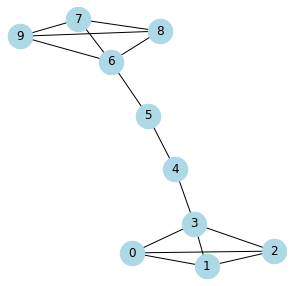

In [ ]:
def plotear_grafo(g, seed=1, size=600, color="lightblue"):
    pos = nx.spring_layout(g, seed=seed)
    plt.figure(figsize=(5, 5))
    nx.draw_networkx(g, pos, node_color=color, node_size=size)
    plt.axis("off")
    plt.show()

plotear_grafo(G)

## Ideas a probar


Opcion A:

    1. Colorear de forma que quede una partición de dos colores en bosques lineales:
        A. Utilizar un Solver de SAT
        B. Backtracking
    
    2. Probar ordenamientos de los paths:
        A. Greedy/Heuristica/Descarte
        B. Fuerza Bruta evitando isomorfismos

Opcion B:
    
    1. Ordenar (Pruneando por isomorfismos, cabeza y cola con $\delta \le 2$, etc)
    
    2. Colorear: Greedy/Backtracking/DFS/BFS
        

In [5]:
def chequear_outerplanar(G):
    # 1. Generacion del Nodo Universal
    H = G.copy()
    nodo_universal = object() # Usamos object() para unicidad garantizada

    H.add_node(nodo_universal)
    edges_to_add = [(nodo_universal, n) for n in G.nodes()]
    H.add_edges_from(edges_to_add)

    # 2. Calcular Planaridad
    is_planar, embedding = nx.check_planarity(H)

    if not is_planar:
        return False, None, None

    # Recuperamos el orden del borde ANTES de borrar el nodo
    # Esto es O(N) y vital para identificar la cara externa luego
    boundary_nodes = list(embedding.neighbors_cw_order(nodo_universal))

    # Borro el nodo universal
    embedding.remove_node(nodo_universal)

    # Retornamos: Exito, Embedding, y la lista de nodos del borde
    return True, embedding, boundary_nodes

In [6]:
# https://stackoverflow.com/questions/67446346/how-to-get-dual-graph-with-networkx

def get_weak_dual(embedding, boundary_nodes):
    """
    Construye el Dual Débil (Weak Dual) de un embedding planar.

    COMPLEJIDAD TOTAL: O(N)
    Justificación: En un grafo planar, el número de aristas E está acotado
    linealmente por los nodos (E <= 3N - 6). Por tanto, recorrer todas las
    aristas es equivalente a O(N).
    """
    if embedding is None: return None

    half_edge_face_map = {}
    faces = {}
    face_id = 0
    visited = set()

    # --- PASO 1: ENCONTRAR CARAS ---
    # Complejidad: O(N)
    # Aunque hay un bucle anidado, el 'visited' asegura que cada (media) arista
    # se procesa EXACTAMENTE UNA VEZ en toda la ejecución.
    # Total de half-edges = 2 * E ≈ 6 * N -> O(N).
    for u in embedding.nodes():
        for v in embedding.neighbors_cw_order(u):
            if (u, v) in visited: continue

            # traverse_face recorre el perímetro de la cara nueva.
            # La suma de los perímetros de todas las caras es exactamente 2*E.
            # Por tanto, el costo acumulado de todas las llamadas a traverse_face es O(N).
            face_nodes = embedding.traverse_face(u, v, mark_half_edges=visited)

            faces[face_id] = face_nodes

            # Mapeamos aristas -> cara (O(K) donde K es tamaño de la cara)
            for i in range(len(face_nodes)):
                a, b = face_nodes[i], face_nodes[(i+1) % len(face_nodes)]
                half_edge_face_map[(a, b)] = face_id

            face_id += 1

    # --- PASO 2: IDENTIFICAR CARA EXTERNA ---
    # Complejidad: O(N)
    # Iteramos sobre las caras. La comparación de sets toma tiempo proporcional
    # al tamaño de la cara. La suma total de tamaños sigue siendo 2*E -> O(N).
    boundary_set = set(boundary_nodes)
    outer_face_id = None

    for fid, nodes in faces.items():
        if len(nodes) == len(boundary_set) and set(nodes) == boundary_set:
            outer_face_id = fid
            break

    # Fallback por seguridad
    if outer_face_id is None:
        outer_face_id = max(faces, key=lambda f: len(faces[f]))

    # --- PASO 3: CONSTRUIR EL GRAFO DUAL ---
    weak_dual = nx.Graph()

    # Agregar nodos: O(Faces) ≈ O(N) por Fórmula de Euler (F ≈ E - V)
    for fid in faces:
        if fid != outer_face_id:
            weak_dual.add_node(fid, nodes=faces[fid])

    # Agregar aristas: O(N)
    # Iteramos sobre el mapa de aristas (tamaño 2*E ≈ 6*N).
    # Las operaciones de diccionario y add_edge son O(1) promedio.
    processed_edges = set()
    for (u, v), f_id_A in half_edge_face_map.items():
        edge_key = frozenset([u, v])
        if edge_key in processed_edges: continue
        processed_edges.add(edge_key)

        # Buscamos la cara opuesta (O(1))
        if (v, u) in half_edge_face_map:
            f_id_B = half_edge_face_map[(v, u)]

            # Conectamos si son caras internas distintas
            if f_id_A != f_id_B:
                if f_id_A != outer_face_id and f_id_B != outer_face_id:
                    weak_dual.add_edge(f_id_A, f_id_B)

    return weak_dual

1. ¿Es Outerplanar?: True
2. Nodos en la cara externa (Borde): [5, 0, 1, 2, 3, 4]
3. Check Dual: El dual es un árbol/bosque (Correcto).


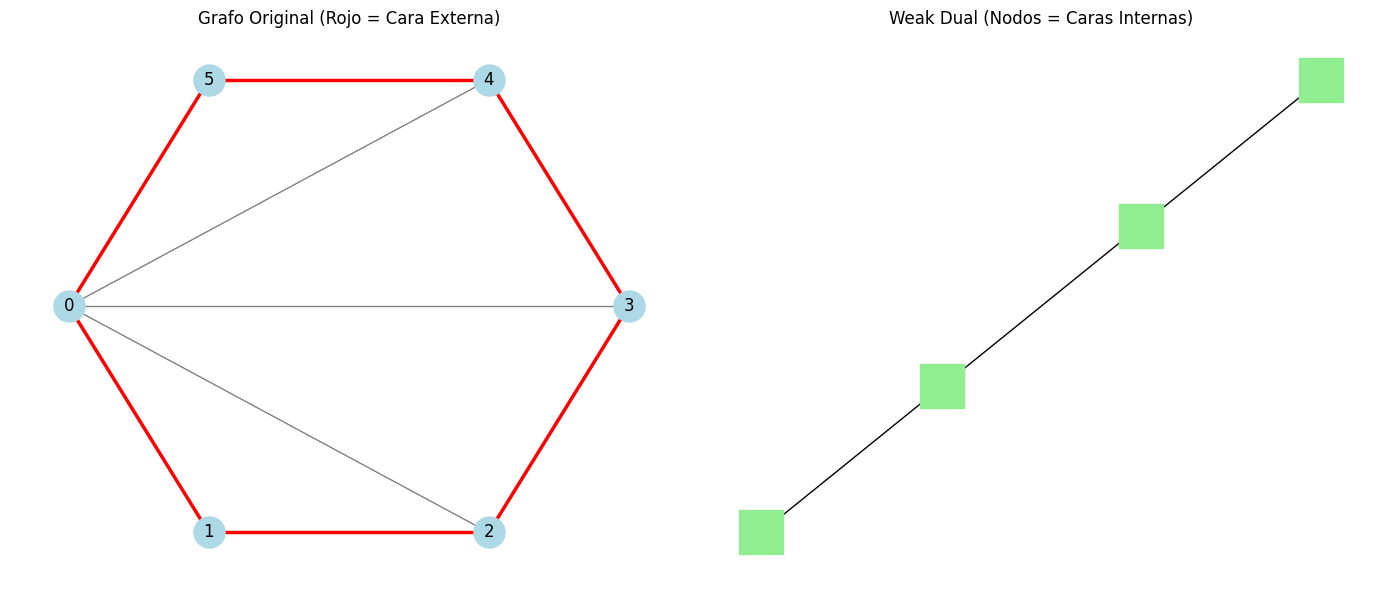

In [8]:
import matplotlib.pyplot as plt

# CREACIÓN DEL GRAFO DE PRUEBA (Un hexágono con cuerdas desde el nodo 0)
# Esto garantiza que sea Outerplanar.
G_test = nx.cycle_graph(6)
G_test.add_edges_from([(0, 2), (0, 3), (0, 4)])

# Ejecución
es_outer, embedding, borde = chequear_outerplanar(G_test)

print(f"1. ¿Es Outerplanar?: {es_outer}")
if es_outer:
    print(f"2. Nodos en la cara externa (Borde): {borde}")

    # Calculamos el Dual
    dual_graph = get_weak_dual(embedding, borde)

    # --- PLOTTING ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Original
    ax1 = axes[0]
    pos_orig = nx.shell_layout(G_test) # Shell layout suele verse bien para outerplanar
    nx.draw(G_test, pos_orig, ax=ax1, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

    # Resaltar el borde en rojo
    # (Creamos las aristas del borde basado en la lista ordenada)
    borde_edges = [(borde[i], borde[(i+1)%len(borde)]) for i in range(len(borde))]
    nx.draw_networkx_edges(G_test, pos_orig, ax=ax1, edgelist=borde_edges, edge_color='red', width=2.5)
    ax1.set_title("Grafo Original (Rojo = Cara Externa)")

    # Plot Weak Dual
    ax2 = axes[1]
    if dual_graph is not None and len(dual_graph) > 0:
        # Usamos spring layout para el dual
        pos_dual = nx.spring_layout(dual_graph)

        # Etiquetas de las caras
        labels = nx.get_node_attributes(dual_graph, 'label')

        nx.draw(dual_graph, pos_dual, ax=ax2, with_labels=False, node_color='lightgreen', node_shape="s", node_size=1000)
        nx.draw_networkx_labels(dual_graph, pos_dual, labels, font_size=8)
        ax2.set_title("Weak Dual (Nodos = Caras Internas)")

        # Verificacion extra: El dual debil de un outerplanar debe ser un arbol (sin ciclos)
        try:
            cycles_dual = nx.find_cycle(dual_graph)
            print("3. Check Dual: ¡ALERTA! El dual tiene ciclos (No debería pasar en outerplanar).")
        except:
            print("3. Check Dual: El dual es un árbol/bosque (Correcto).")

    else:
        ax2.set_title("El grafo no tiene caras internas (es solo un ciclo o árbol)")

    plt.tight_layout()
    plt.show()

else:
    print("El grafo no es outerplanar, no se puede calcular el dual débil.")